In [ ]:
'''
Pyspark Final Project
Shree Prada: C0887257
'''

In [2]:
# Import SparkSession class from pyspark.sql module
from pyspark.sql import SparkSession

### Create spark session

In [3]:
# Create a SparkSession object and assign it to the variable 'spark'
spark = SparkSession.builder.appName('Dataframe').getOrCreate()

In [4]:
spark

In [6]:
# Read the CSV file 'flights-larger.csv' into a Spark DataFrame named 'df'

df = spark.read \
  .option('header', 'true') \
  .csv('/Spark final project/flights-larger.csv', inferSchema=True)


## Print Schema

In [7]:
# Print the schema of the DataFrame 'df'
df.printSchema()

root
 |-- mon: integer (nullable = true)
 |-- dom: integer (nullable = true)
 |-- dow: integer (nullable = true)
 |-- carrier: string (nullable = true)
 |-- flight: integer (nullable = true)
 |-- org: string (nullable = true)
 |-- mile: integer (nullable = true)
 |-- depart: double (nullable = true)
 |-- duration: integer (nullable = true)
 |-- delay: string (nullable = true)



## Simple data inspection

In [8]:
type(df) #dataframe is a data structure

pyspark.sql.dataframe.DataFrame

In [9]:
# Get a list of column names from the DataFrame 'df'
column_names = df.columns

['mon',
 'dom',
 'dow',
 'carrier',
 'flight',
 'org',
 'mile',
 'depart',
 'duration',
 'delay']

In [41]:
# Get a list of tuples containing column names and data types for 'df'
df.dtypes

[('mon', 'int'),
 ('dom', 'int'),
 ('dow', 'int'),
 ('carrier', 'string'),
 ('flight', 'int'),
 ('org', 'string'),
 ('mile', 'int'),
 ('depart', 'double'),
 ('duration', 'int'),
 ('delay', 'string')]

In [43]:
# Get the first row from DataFrame 'df'
df.head()

Row(mon=10, dom=10, dow=1, carrier='OO', flight=5836, org='ORD', mile=157, depart=8.18, duration=51, delay='27')

In [44]:
#Return first n rows()
df.take(4)

[Row(mon=10, dom=10, dow=1, carrier='OO', flight=5836, org='ORD', mile=157, depart=8.18, duration=51, delay='27'),
 Row(mon=1, dom=4, dow=1, carrier='OO', flight=5866, org='ORD', mile=466, depart=15.5, duration=102, delay='NA'),
 Row(mon=11, dom=22, dow=1, carrier='OO', flight=6016, org='ORD', mile=738, depart=7.17, duration=127, delay='-19'),
 Row(mon=2, dom=14, dow=5, carrier='B6', flight=199, org='JFK', mile=2248, depart=21.17, duration=365, delay='60')]

In [42]:
# Display the first 2 rows of DataFrame 'df'
df.show(2)

+---+---+---+-------+------+---+----+------+--------+-----+
|mon|dom|dow|carrier|flight|org|mile|depart|duration|delay|
+---+---+---+-------+------+---+----+------+--------+-----+
| 10| 10|  1|     OO|  5836|ORD| 157|  8.18|      51|   27|
|  1|  4|  1|     OO|  5866|ORD| 466|  15.5|     102|   NA|
+---+---+---+-------+------+---+----+------+--------+-----+
only showing top 2 rows



In [45]:
# Compute summary statistics for the numerical columns in 'df' and display them
print(df.describe().show())

+-------+------------------+-----------------+------------------+-------+------------------+------+-----------------+------------------+------------------+-----------------+
|summary|               mon|              dom|               dow|carrier|            flight|   org|             mile|            depart|          duration|            delay|
+-------+------------------+-----------------+------------------+-------+------------------+------+-----------------+------------------+------------------+-----------------+
|  count|            275000|           275000|            275000| 275000|            275000|275000|           275000|            275000|            275000|           275000|
|   mean|           5.24232|15.71406909090909| 2.946090909090909|   NULL|2063.0542763636363|  NULL|881.2222872727273|14.124930981817384|151.64103636363637|28.34773064280709|
| stddev|3.4273573316203576|8.805568383848067|1.9635141531217672|   NULL| 2185.852169684581|  NULL|700.5178890821038| 4.6831895034

In [11]:
# Selecting the 'carrier' column from the DataFrame
df.select('carrier')

DataFrame[carrier: string]

In [12]:
# Selecting the 'carrier' column from the DataFrame and displaying its contents
df.select('carrier').show()

+-------+
|carrier|
+-------+
|     OO|
|     OO|
|     OO|
|     B6|
|     WN|
|     B6|
|     B6|
|     UA|
|     US|
|     AA|
|     B6|
|     AA|
|     B6|
|     AA|
|     UA|
|     OH|
|     UA|
|     OH|
|     UA|
|     AA|
+-------+
only showing top 20 rows



In [13]:
# Selecting the columns 'carrier' and 'dom' from the DataFrame and displaying their contents
df.select(['carrier', 'dom']).show()

+-------+---+
|carrier|dom|
+-------+---+
|     OO| 10|
|     OO|  4|
|     OO| 22|
|     B6| 14|
|     WN| 25|
|     B6| 28|
|     B6| 28|
|     UA| 19|
|     US|  5|
|     AA| 27|
|     B6| 20|
|     AA|  3|
|     B6| 26|
|     AA|  9|
|     UA|  8|
|     OH| 10|
|     UA| 14|
|     OH|  8|
|     UA| 14|
|     AA|  2|
+-------+---+
only showing top 20 rows



In [14]:
# Generating descriptive statistics for all numerical columns in the DataFrame and displaying the results
df.describe().show()

+-------+------------------+-----------------+------------------+-------+------------------+------+-----------------+------------------+------------------+-----------------+
|summary|               mon|              dom|               dow|carrier|            flight|   org|             mile|            depart|          duration|            delay|
+-------+------------------+-----------------+------------------+-------+------------------+------+-----------------+------------------+------------------+-----------------+
|  count|            275000|           275000|            275000| 275000|            275000|275000|           275000|            275000|            275000|           275000|
|   mean|           5.24232|15.71406909090909| 2.946090909090909|   NULL|2063.0542763636363|  NULL|881.2222872727273|14.124930981817384|151.64103636363637|28.34773064280709|
| stddev|3.4273573316203576|8.805568383848067|1.9635141531217672|   NULL| 2185.852169684581|  NULL|700.5178890821038| 4.6831895034

In [47]:
# Counting the number of rows in the DataFrame
df.count()

275000

In [48]:
# Counting the number of distinct rows in the DataFrame
print(df.distinct().count())

275000


In [50]:
# Printing the execution plan of DataFrame operations, including both physical and logical plans
df.explain()

== Physical Plan ==
FileScan csv [mon#17,dom#18,dow#19,carrier#20,flight#21,org#22,mile#23,depart#24,duration#25,delay#26] Batched: false, DataFilters: [], Format: CSV, Location: InMemoryFileIndex(1 paths)[file:/content/drive/MyDrive/Spark final project/flights-larger.csv], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<mon:int,dom:int,dow:int,carrier:string,flight:int,org:string,mile:int,depart:double,durati...




In [15]:
# Adding a new column 'mon after 2' to the DataFrame by adding 2 to the values in the 'mon' column
df.withColumn('mon after 2', df['mon'] + 2)

DataFrame[mon: int, dom: int, dow: int, carrier: string, flight: int, org: string, mile: int, depart: double, duration: int, delay: string, mon after 2: int]

In [51]:
# Selecting and displaying the 'flight' column from the DataFrame, showing the first 10 entries
df.select("flight").show(10)

+------+
|flight|
+------+
|  5836|
|  5866|
|  6016|
|   199|
|  1675|
|   377|
|   904|
|   820|
|  2175|
|  1240|
+------+
only showing top 10 rows



In [52]:
# Selecting and displaying the columns 'mon', 'dom', 'flight', and 'delay' from the DataFrame, showing the first 10 entries
df.select("mon", "dom", "flight", "delay").show(10)

+---+---+------+-----+
|mon|dom|flight|delay|
+---+---+------+-----+
| 10| 10|  5836|   27|
|  1|  4|  5866|   NA|
| 11| 22|  6016|  -19|
|  2| 14|   199|   60|
|  5| 25|  1675|   22|
|  3| 28|   377|   70|
|  5| 28|   904|   47|
|  1| 19|   820|  135|
|  8|  5|  2175|  -10|
|  5| 27|  1240|  -11|
+---+---+------+-----+
only showing top 10 rows



In [16]:
# Adding a new column 'mon after 2' to the DataFrame by adding 2 to the values in the 'mon' column and displaying the DataFrame
df.withColumn('mon after 2', df['mon'] + 2).show()

+---+---+---+-------+------+---+----+------+--------+-----+-----------+
|mon|dom|dow|carrier|flight|org|mile|depart|duration|delay|mon after 2|
+---+---+---+-------+------+---+----+------+--------+-----+-----------+
| 10| 10|  1|     OO|  5836|ORD| 157|  8.18|      51|   27|         12|
|  1|  4|  1|     OO|  5866|ORD| 466|  15.5|     102|   NA|          3|
| 11| 22|  1|     OO|  6016|ORD| 738|  7.17|     127|  -19|         13|
|  2| 14|  5|     B6|   199|JFK|2248| 21.17|     365|   60|          4|
|  5| 25|  3|     WN|  1675|SJC| 386| 12.92|      85|   22|          7|
|  3| 28|  1|     B6|   377|LGA|1076| 13.33|     182|   70|          5|
|  5| 28|  6|     B6|   904|ORD| 740|  9.58|     130|   47|          7|
|  1| 19|  2|     UA|   820|SFO| 679| 12.75|     123|  135|          3|
|  8|  5|  5|     US|  2175|LGA| 214|  13.0|      71|  -10|         10|
|  5| 27|  5|     AA|  1240|ORD|1197| 14.42|     195|  -11|          7|
|  8| 20|  6|     B6|   119|JFK|1182| 14.67|     198|   20|     

In [17]:
# Dropping the column 'mon after 2' from the DataFrame
df.drop('mon after 2')

DataFrame[mon: int, dom: int, dow: int, carrier: string, flight: int, org: string, mile: int, depart: double, duration: int, delay: string]

In [18]:
df.show()

+---+---+---+-------+------+---+----+------+--------+-----+
|mon|dom|dow|carrier|flight|org|mile|depart|duration|delay|
+---+---+---+-------+------+---+----+------+--------+-----+
| 10| 10|  1|     OO|  5836|ORD| 157|  8.18|      51|   27|
|  1|  4|  1|     OO|  5866|ORD| 466|  15.5|     102|   NA|
| 11| 22|  1|     OO|  6016|ORD| 738|  7.17|     127|  -19|
|  2| 14|  5|     B6|   199|JFK|2248| 21.17|     365|   60|
|  5| 25|  3|     WN|  1675|SJC| 386| 12.92|      85|   22|
|  3| 28|  1|     B6|   377|LGA|1076| 13.33|     182|   70|
|  5| 28|  6|     B6|   904|ORD| 740|  9.58|     130|   47|
|  1| 19|  2|     UA|   820|SFO| 679| 12.75|     123|  135|
|  8|  5|  5|     US|  2175|LGA| 214|  13.0|      71|  -10|
|  5| 27|  5|     AA|  1240|ORD|1197| 14.42|     195|  -11|
|  8| 20|  6|     B6|   119|JFK|1182| 14.67|     198|   20|
|  2|  3|  1|     AA|  1881|JFK|1090| 15.92|     200|   -9|
|  8| 26|  5|     B6|    35|JFK|1028| 20.58|     193|  102|
|  4|  9|  5|     AA|   336|ORD| 733|  2

## Renaming Columns

In [19]:
# Renaming the column 'MMon' to 'mon' in the DataFrame and displaying the updated DataFrame
df.withColumnRenamed('MMon', 'mon').show()

+---+---+---+-------+------+---+----+------+--------+-----+
|mon|dom|dow|carrier|flight|org|mile|depart|duration|delay|
+---+---+---+-------+------+---+----+------+--------+-----+
| 10| 10|  1|     OO|  5836|ORD| 157|  8.18|      51|   27|
|  1|  4|  1|     OO|  5866|ORD| 466|  15.5|     102|   NA|
| 11| 22|  1|     OO|  6016|ORD| 738|  7.17|     127|  -19|
|  2| 14|  5|     B6|   199|JFK|2248| 21.17|     365|   60|
|  5| 25|  3|     WN|  1675|SJC| 386| 12.92|      85|   22|
|  3| 28|  1|     B6|   377|LGA|1076| 13.33|     182|   70|
|  5| 28|  6|     B6|   904|ORD| 740|  9.58|     130|   47|
|  1| 19|  2|     UA|   820|SFO| 679| 12.75|     123|  135|
|  8|  5|  5|     US|  2175|LGA| 214|  13.0|      71|  -10|
|  5| 27|  5|     AA|  1240|ORD|1197| 14.42|     195|  -11|
|  8| 20|  6|     B6|   119|JFK|1182| 14.67|     198|   20|
|  2|  3|  1|     AA|  1881|JFK|1090| 15.92|     200|   -9|
|  8| 26|  5|     B6|    35|JFK|1028| 20.58|     193|  102|
|  4|  9|  5|     AA|   336|ORD| 733|  2

## 'isin' Operation

In [53]:
# Selecting and displaying rows from the DataFrame where the 'carrier' column contains values "OO" or "B6"
df[df.carrier.isin("OO", "B6")].show()

+---+---+---+-------+------+---+----+------+--------+-----+
|mon|dom|dow|carrier|flight|org|mile|depart|duration|delay|
+---+---+---+-------+------+---+----+------+--------+-----+
| 10| 10|  1|     OO|  5836|ORD| 157|  8.18|      51|   27|
|  1|  4|  1|     OO|  5866|ORD| 466|  15.5|     102|   NA|
| 11| 22|  1|     OO|  6016|ORD| 738|  7.17|     127|  -19|
|  2| 14|  5|     B6|   199|JFK|2248| 21.17|     365|   60|
|  3| 28|  1|     B6|   377|LGA|1076| 13.33|     182|   70|
|  5| 28|  6|     B6|   904|ORD| 740|  9.58|     130|   47|
|  8| 20|  6|     B6|   119|JFK|1182| 14.67|     198|   20|
|  8| 26|  5|     B6|    35|JFK|1028| 20.58|     193|  102|
|  2| 22|  6|     OO|  6669|ORD|1186| 10.25|     194|   21|
|  0| 16|  3|     OO|  6026|SFO| 372| 14.77|      88|  -14|
|  0|  1|  2|     OO|  5886|ORD|  84| 16.83|      46|   NA|
|  0|  3|  4|     OO|  5655|SMF|  86|  10.7|      54|   42|
|  5|  8|  0|     OO|  3897|ORD|1249| 13.25|     216|  194|
|  2| 10|  1|     B6|   347|JFK|1041|  1

# Like Operation

In [54]:
# Selecting the 'flight', 'org', and a Boolean indicating if 'org' contains the letter "G" from the DataFrame and displaying the first 15 entries
df.select("flight", "org", df.org.like("%G%")).show(15)

+------+---+------------+
|flight|org|org LIKE %G%|
+------+---+------------+
|  5836|ORD|       false|
|  5866|ORD|       false|
|  6016|ORD|       false|
|   199|JFK|       false|
|  1675|SJC|       false|
|   377|LGA|        true|
|   904|ORD|       false|
|   820|SFO|       false|
|  2175|LGA|        true|
|  1240|ORD|       false|
|   119|JFK|       false|
|  1881|JFK|       false|
|    35|JFK|       false|
|   336|ORD|       false|
|   678|ORD|       false|
+------+---+------------+
only showing top 15 rows



## StartsWith - EndsWith Operation

In [55]:
# Selecting the 'org', 'flight', and a Boolean indicating if 'org' starts with "O" from the DataFrame and displaying the first 5 entries
df.select("org", "flight", df.org.startswith("O")).show(5)

+---+------+------------------+
|org|flight|startswith(org, O)|
+---+------+------------------+
|ORD|  5836|              true|
|ORD|  5866|              true|
|ORD|  6016|              true|
|JFK|   199|             false|
|SJC|  1675|             false|
+---+------+------------------+
only showing top 5 rows



## GroupBy Operations

In [56]:
# Grouping the DataFrame by the 'org' column and counting the occurrences of each value, then displaying the results
df.groupBy("org").count().show(10)

+---+------+
|org| count|
+---+------+
|SJC| 16701|
|LGA| 27826|
|SMF| 16854|
|SFO| 52424|
|ORD|106018|
|TUS|  6181|
|JFK| 43468|
|OGG|  5528|
+---+------+



## Filter Operation

In [58]:
# Filtering the DataFrame to only include rows where the value in the 'org' column is 'ORD', then displaying the first 5 entries
df.filter(df.org == 'ORD').show(5)

+---+---+---+-------+------+---+----+------+--------+-----+
|mon|dom|dow|carrier|flight|org|mile|depart|duration|delay|
+---+---+---+-------+------+---+----+------+--------+-----+
| 10| 10|  1|     OO|  5836|ORD| 157|  8.18|      51|   27|
|  1|  4|  1|     OO|  5866|ORD| 466|  15.5|     102|   NA|
| 11| 22|  1|     OO|  6016|ORD| 738|  7.17|     127|  -19|
|  5| 28|  6|     B6|   904|ORD| 740|  9.58|     130|   47|
|  5| 27|  5|     AA|  1240|ORD|1197| 14.42|     195|  -11|
+---+---+---+-------+------+---+----+------+--------+-----+
only showing top 5 rows



## Running SQL commands in Spark

In [59]:
# Registering the DataFrame as a temporary table named "df_temp"
df.registerTempTable("df_temp")

/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:329: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [60]:
# Executing a SQL query to select all columns from the temporary table "df_temp" and displaying the first 3 rows
spark.sql("SELECT * FROM df_temp").show(3)

+---+---+---+-------+------+---+----+------+--------+-----+
|mon|dom|dow|carrier|flight|org|mile|depart|duration|delay|
+---+---+---+-------+------+---+----+------+--------+-----+
| 10| 10|  1|     OO|  5836|ORD| 157|  8.18|      51|   27|
|  1|  4|  1|     OO|  5866|ORD| 466|  15.5|     102|   NA|
| 11| 22|  1|     OO|  6016|ORD| 738|  7.17|     127|  -19|
+---+---+---+-------+------+---+----+------+--------+-----+
only showing top 3 rows



In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

#**Flight Delay Prediction**

In [20]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import os  # Importing os module for operating system functionalities
import pyspark  # Importing PySpark library
from pyspark.sql import SparkSession  # Importing SparkSession from PySpark SQL module
from pyspark.sql.types import StructType, StructField, IntegerType, StringType  # Importing data types from PySpark SQL module

from pyspark.sql.functions import round  # Importing round function from PySpark SQL functions module
from pyspark.ml.feature import StringIndexer  # Importing StringIndexer for string indexing
from pyspark.ml.feature import VectorAssembler  # Importing VectorAssembler for vectorization of features
from pyspark.ml.classification import DecisionTreeClassifier  # Importing DecisionTreeClassifier for classification
from pyspark.ml.classification import LogisticRegression  # Importing LogisticRegression for classification
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator  # Importing evaluators for model evaluation

In [21]:
# Creating a SparkSession with specified configurations
spark = SparkSession.builder \
                    .master('local[*]') \  # Running Spark locally using all available cores
                    .appName('MachineLearning with PySpark') \  # Setting the application name
                    .getOrCreate()  # Creating or getting an existing SparkSession
spark

In [22]:
# Reading a CSV file into a DataFrame with specified options
flights_df = spark.read.csv('/Spark final project/flights-larger.csv',  # Path to the CSV file
                             sep=',',  # Separator for the CSV file
                             header=True,  # Treating the first row as header
                             inferSchema=True,  # Inferring the schema of the DataFrame
                             nullValue='NA')  # Specifying the null value for the DataFrame


In [23]:
# Printing the number of records in the DataFrame
print("The data contain %d records." % flights_df.count())

# Displaying the first 5 rows of the DataFrame
flights_df.show(5)

The data contain 275000 records.
+---+---+---+-------+------+---+----+------+--------+-----+
|mon|dom|dow|carrier|flight|org|mile|depart|duration|delay|
+---+---+---+-------+------+---+----+------+--------+-----+
| 10| 10|  1|     OO|  5836|ORD| 157|  8.18|      51|   27|
|  1|  4|  1|     OO|  5866|ORD| 466|  15.5|     102| NULL|
| 11| 22|  1|     OO|  6016|ORD| 738|  7.17|     127|  -19|
|  2| 14|  5|     B6|   199|JFK|2248| 21.17|     365|   60|
|  5| 25|  3|     WN|  1675|SJC| 386| 12.92|      85|   22|
+---+---+---+-------+------+---+----+------+--------+-----+
only showing top 5 rows



In [25]:
# Printing the schema of the DataFrame
print("Schema:")
flights_df.printSchema()

Schema:
root
 |-- mon: integer (nullable = true)
 |-- dom: integer (nullable = true)
 |-- dow: integer (nullable = true)
 |-- carrier: string (nullable = true)
 |-- flight: integer (nullable = true)
 |-- org: string (nullable = true)
 |-- mile: integer (nullable = true)
 |-- depart: double (nullable = true)
 |-- duration: integer (nullable = true)
 |-- delay: integer (nullable = true)



In [24]:
# Getting the data types of each column in the DataFrame
flights_df.dtypes

[('mon', 'int'),
 ('dom', 'int'),
 ('dow', 'int'),
 ('carrier', 'string'),
 ('flight', 'int'),
 ('org', 'string'),
 ('mile', 'int'),
 ('depart', 'double'),
 ('duration', 'int'),
 ('delay', 'int')]

### **Exploratory data analysis (EDA)**

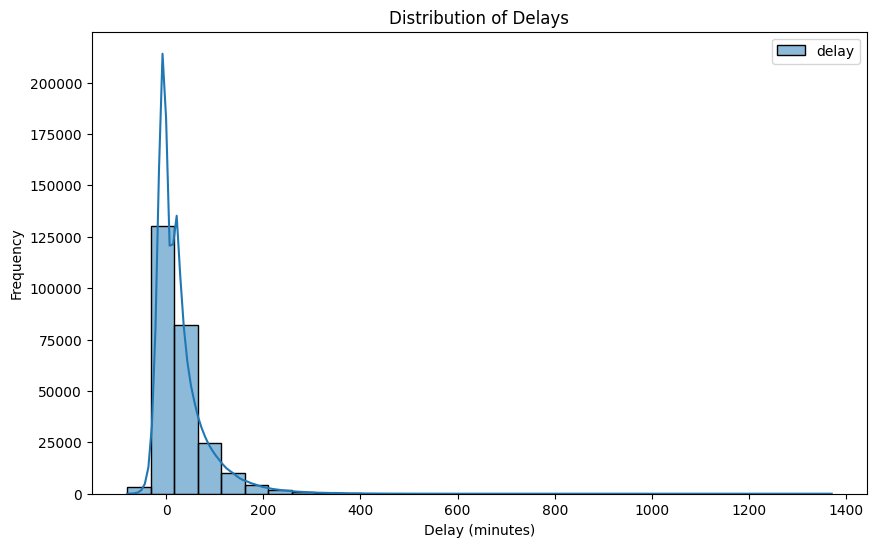

In [63]:
# Visualizing the distribution of delays
plt.figure(figsize=(10, 6))
sns.histplot(flights_df.select('delay').toPandas(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Delays')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

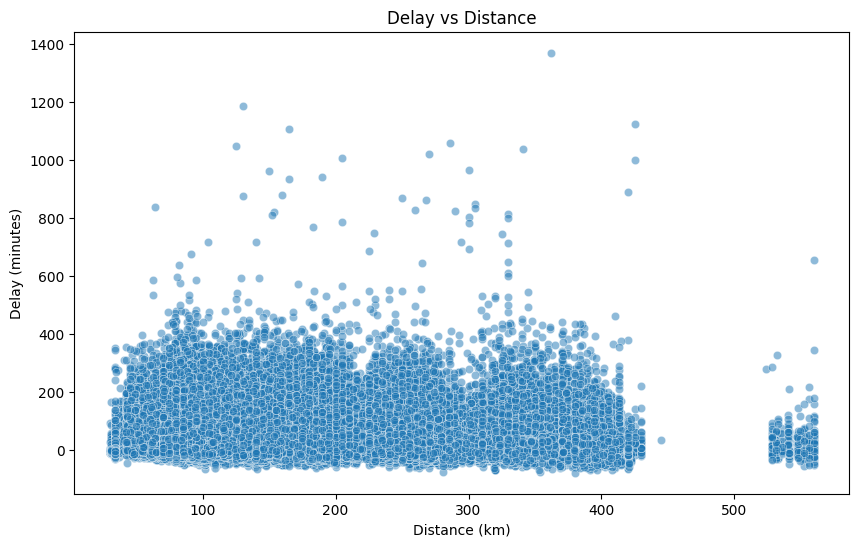

In [71]:
# Visualizing the relationship between delay and distance
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='delay', data=flights_df.toPandas(), alpha=0.5)
plt.title('Delay vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Delay (minutes)')
plt.show()

<ipython-input-72-d1223ff9862c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='carrier', y='delay', data=flights_df.toPandas(), palette='viridis')


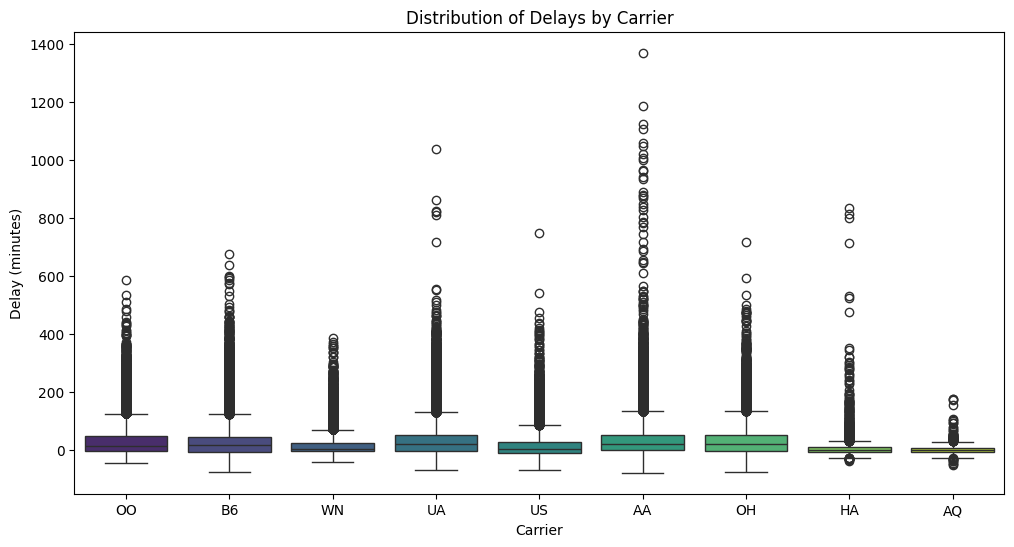

In [72]:
# Visualizing the distribution of delays by carrier
plt.figure(figsize=(12, 6))
sns.boxplot(x='carrier', y='delay', data=flights_df.toPandas(), palette='viridis')
plt.title('Distribution of Delays by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Delay (minutes)')
plt.show()

<ipython-input-73-e25aebe92a8a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='org', y='delay', data=flights_df.toPandas(), palette='Set2')


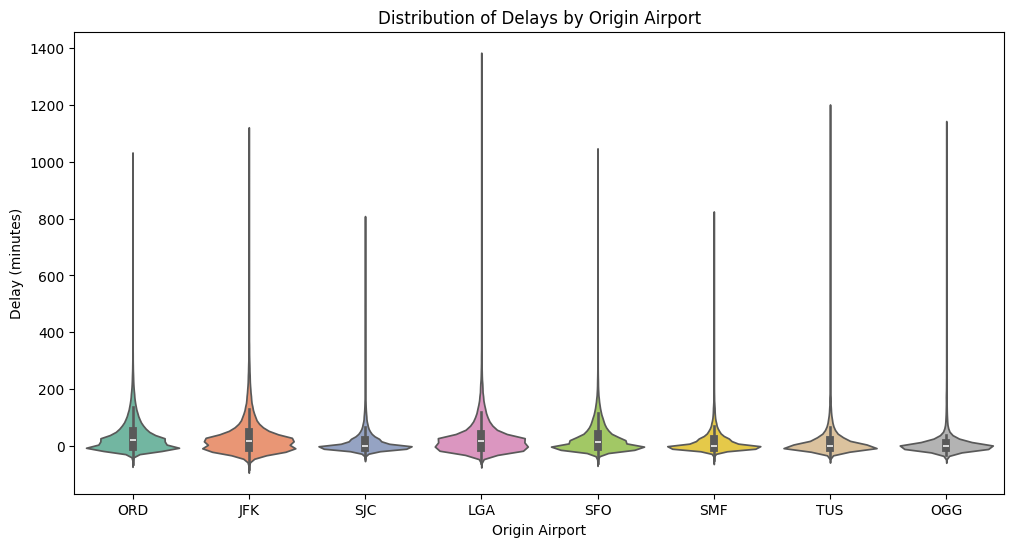

In [73]:
# Visualizing the distribution of delays by origin airport
plt.figure(figsize=(12, 6))
sns.violinplot(x='org', y='delay', data=flights_df.toPandas(), palette='Set2')
plt.title('Distribution of Delays by Origin Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Delay (minutes)')
plt.show()

<ipython-input-74-9ae2d1c21b8d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mon', y='delay', data=flights_df.toPandas(), palette='pastel')


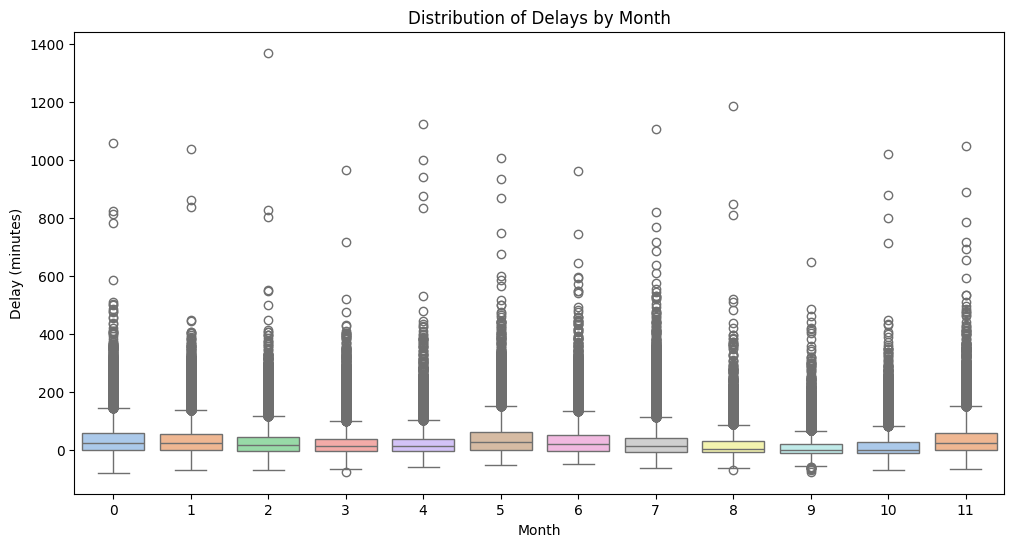

In [74]:
# Visualizing the distribution of delays by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='mon', y='delay', data=flights_df.toPandas(), palette='pastel')
plt.title('Distribution of Delays by Month')
plt.xlabel('Month')
plt.ylabel('Delay (minutes)')
plt.show()

### Handling missing values

In [26]:
# Dropping the 'flight' column from the DataFrame
flights_df = flights_df.drop('flight')

# Dropping rows with missing values from the DataFrame
flights_df = flights_df.dropna()

# Printing the number of records after dropping rows with missing values
print(f"Data after dropping rows with missing values: {flights_df.count()}")

Data after dropping rows with missing values: 258289


### **RDD**

In [29]:
# Getting schema information using summary and extracting schema
schema = flights_df.select(*flights_df.columns).summary().schema

# Calculating unique value counts for each column
unique_value_counts = flights_df.select(*flights_df.columns).summary().rdd.flatMap(lambda x: [(col.name, x[i]) for i, col in enumerate(schema)]).toDF(['column_name', 'unique_values'])

# Displaying unique value counts for each column
unique_value_counts.show()


+-----------+------------------+
|column_name|     unique_values|
+-----------+------------------+
|    summary|             count|
|        mon|            258289|
|        dom|            258289|
|        dow|            258289|
|    carrier|            258289|
|        org|            258289|
|       mile|            258289|
|     depart|            258289|
|   duration|            258289|
|      delay|            258289|
|    summary|              mean|
|        mon| 5.287941027298879|
|        dom|15.725110244725869|
|        dow|2.9510044949649425|
|    carrier|              NULL|
|        org|              NULL|
|       mile| 890.2974458842614|
|     depart|14.088846911791904|
|   duration|152.54255117329814|
|      delay| 28.34773064280709|
+-----------+------------------+
only showing top 20 rows



## Data Preprocessing (conversions, feature engineering)

In [30]:
# Adding a new column 'km' to represent distance in kilometers and rounding it to the nearest integer
flights_km = flights_df.withColumn('km', round(flights_df.mile * 1.60934, 0)) \
                    .drop('mile')

# Adding a new column 'label' to indicate whether the flight was delayed by 15 minutes or more, and converting it to integer type
flights_km = flights_km.withColumn('label', (flights_km.delay >= 15).cast('integer'))

# Displaying the first 5 rows of the DataFrame after preprocessing
flights_km.show(5)

+---+---+---+-------+---+------+--------+-----+------+-----+
|mon|dom|dow|carrier|org|depart|duration|delay|    km|label|
+---+---+---+-------+---+------+--------+-----+------+-----+
| 10| 10|  1|     OO|ORD|  8.18|      51|   27| 253.0|    1|
| 11| 22|  1|     OO|ORD|  7.17|     127|  -19|1188.0|    0|
|  2| 14|  5|     B6|JFK| 21.17|     365|   60|3618.0|    1|
|  5| 25|  3|     WN|SJC| 12.92|      85|   22| 621.0|    1|
|  3| 28|  1|     B6|LGA| 13.33|     182|   70|1732.0|    1|
+---+---+---+-------+---+------+--------+-----+------+-----+
only showing top 5 rows



### **Encoding Categorical variables through Indexing**

In [31]:
# Indexing the 'carrier' column and adding a new column 'carrier_idx' to the DataFrame
flights_indexed = StringIndexer(inputCol='carrier', outputCol='carrier_idx').fit(flights_km).transform(flights_km)

# Indexing the 'org' column and adding a new column 'org_idx' to the DataFrame
flights_indexed = StringIndexer(inputCol='org', outputCol='org_idx').fit(flights_indexed).transform(flights_indexed)

# Displaying the first 5 rows of the DataFrame after indexing
flights_indexed.show(5)

+---+---+---+-------+---+------+--------+-----+------+-----+-----------+-------+
|mon|dom|dow|carrier|org|depart|duration|delay|    km|label|carrier_idx|org_idx|
+---+---+---+-------+---+------+--------+-----+------+-----+-----------+-------+
| 10| 10|  1|     OO|ORD|  8.18|      51|   27| 253.0|    1|        2.0|    0.0|
| 11| 22|  1|     OO|ORD|  7.17|     127|  -19|1188.0|    0|        2.0|    0.0|
|  2| 14|  5|     B6|JFK| 21.17|     365|   60|3618.0|    1|        4.0|    2.0|
|  5| 25|  3|     WN|SJC| 12.92|      85|   22| 621.0|    1|        3.0|    5.0|
|  3| 28|  1|     B6|LGA| 13.33|     182|   70|1732.0|    1|        4.0|    3.0|
+---+---+---+-------+---+------+--------+-----+------+-----+-----------+-------+
only showing top 5 rows



In [32]:
# Creating a VectorAssembler to assemble input features into a single vector column
assembler = VectorAssembler(inputCols=['mon', 'dom', 'dow', 'carrier_idx', 'org_idx', 'km', 'depart', 'duration'], outputCol='features')

# Transforming the DataFrame by assembling the input features into the 'features' column
flights_assembled = assembler.transform(flights_indexed)

# Selecting the 'features' column and 'delay' column and displaying the first 5 rows
flights_assembled.select('features', 'delay').show(5, truncate=False)

+-----------------------------------------+-----+
|features                                 |delay|
+-----------------------------------------+-----+
|[10.0,10.0,1.0,2.0,0.0,253.0,8.18,51.0]  |27   |
|[11.0,22.0,1.0,2.0,0.0,1188.0,7.17,127.0]|-19  |
|[2.0,14.0,5.0,4.0,2.0,3618.0,21.17,365.0]|60   |
|[5.0,25.0,3.0,3.0,5.0,621.0,12.92,85.0]  |22   |
|[3.0,28.0,1.0,4.0,3.0,1732.0,13.33,182.0]|70   |
+-----------------------------------------+-----+
only showing top 5 rows



### Data Transformation

In [34]:
from pyspark.ml.feature import StandardScaler

# Feature scaling using StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withMean=True, withStd=True)

# Fitting the StandardScaler to the data and transforming the DataFrame
flights_scaled = scaler.fit(flights_assembled).transform(flights_assembled)

# Displaying the 'features' column and 'delay' column of the scaled DataFrame
flights_scaled.select('features', 'delay').show(5, truncate=False)

+-----------------------------------------+-----+
|features                                 |delay|
+-----------------------------------------+-----+
|[10.0,10.0,1.0,2.0,0.0,253.0,8.18,51.0]  |27   |
|[11.0,22.0,1.0,2.0,0.0,1188.0,7.17,127.0]|-19  |
|[2.0,14.0,5.0,4.0,2.0,3618.0,21.17,365.0]|60   |
|[5.0,25.0,3.0,3.0,5.0,621.0,12.92,85.0]  |22   |
|[3.0,28.0,1.0,4.0,3.0,1732.0,13.33,182.0]|70   |
+-----------------------------------------+-----+
only showing top 5 rows



### Model Building

In [35]:
# Splitting the scaled DataFrame into training and testing sets
flights_train, flights_test = flights_scaled.randomSplit([0.8, 0.2], seed=42)

# Calculating the ratio of training data to the total data
training_ratio = flights_train.count() / flights_scaled.count()

# Displaying the training data ratio
training_ratio

0.7997359546864171

### DecisionTreeClassifier

In [36]:
# Creating a DecisionTreeClassifier model
tree = DecisionTreeClassifier()

# Fitting the DecisionTreeClassifier model to the training data
tree_model = tree.fit(flights_train)

# Making predictions on the testing data
prediction = tree_model.transform(flights_test)

# Selecting and displaying the 'label', 'prediction', and 'probability' columns of the prediction DataFrame
prediction.select('label', 'prediction', 'probability').show(5, False)

+-----+----------+----------------------------------------+
|label|prediction|probability                             |
+-----+----------+----------------------------------------+
|0    |1.0       |[0.31545301069217785,0.6845469893078222]|
|1    |1.0       |[0.31545301069217785,0.6845469893078222]|
|0    |1.0       |[0.31545301069217785,0.6845469893078222]|
|0    |1.0       |[0.4469993101862497,0.5530006898137503] |
|0    |1.0       |[0.31545301069217785,0.6845469893078222]|
+-----+----------+----------------------------------------+
only showing top 5 rows



### Evaluation of the model

In [37]:
# Grouping the prediction DataFrame by 'label' and 'prediction' columns and counting the occurrences
prediction.groupBy('label', 'prediction').count().show()

# Calculating the elements of the confusion matrix
TN = prediction.filter('prediction = 0 AND label = prediction').count()  # True Negative
TP = prediction.filter('prediction = 1 AND label = prediction').count()  # True Positive
FN = prediction.filter('prediction = 0 AND label != prediction').count()  # False Negative
FP = prediction.filter('prediction = 1 AND label != prediction').count()  # False Positive

# Calculating the accuracy using elements of the confusion matrix
accuracy = (TN + TP) / (TN + TP + FN + FP)

# Displaying the accuracy
accuracy


+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0| 9213|
|    0|       0.0|16340|
|    1|       1.0|16680|
|    0|       1.0| 9493|
+-----+----------+-----+



0.638363685573986

### Logistic Regression

In [38]:
# Creating a LogisticRegression model and fitting it to the training data
logistic = LogisticRegression().fit(flights_train)

# Making predictions on the testing data
prediction = logistic.transform(flights_test)

# Grouping the prediction DataFrame by 'label' and 'prediction' columns and counting the occurrences
prediction.groupBy('label', 'prediction').count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0| 9378|
|    0|       0.0|15026|
|    1|       1.0|16515|
|    0|       1.0|10807|
+-----+----------+-----+



### Evaluating Logistic Regression Model

precision = 0.64
recall    = 0.64


<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

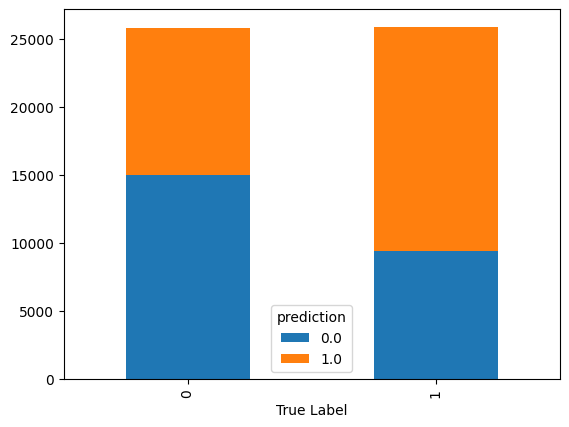

In [75]:
# Calculating precision and recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print('precision = {:.2f}\nrecall    = {:.2f}'.format(precision, recall))

# Finding weighted precision using MulticlassClassificationEvaluator
multi_evaluator = MulticlassClassificationEvaluator()
weighted_precision = multi_evaluator.evaluate(prediction, {multi_evaluator.metricName: "weightedPrecision"})

# Finding AUC using BinaryClassificationEvaluator
binary_evaluator = BinaryClassificationEvaluator()
auc = binary_evaluator.evaluate(prediction, {binary_evaluator.metricName: "areaUnderROC"})

# Visualizing the confusion matrix
confusion_matrix = prediction.groupBy('label', 'prediction').count().toPandas()
confusion_matrix.pivot(index='label', columns='prediction', values='count').plot(kind='bar', stacked=True)
plt.xlabel('True Label')
plt.ylabel


### Random Forest Classifier

In [77]:
from pyspark.ml.classification import RandomForestClassifier

# Using Random Forest Classifier
rf = RandomForestClassifier()
rf_model = rf.fit(flights_train)

# Prediction using Random Forest
rf_prediction = rf_model.transform(flights_test)
rf_prediction.select('label', 'prediction', 'probability').show(5, False)

# Evaluation of the Random Forest model
rf_prediction.groupBy('label', 'prediction').count().show()

# Calculate the elements of the confusion matrix for Random Forest
rf_TN = rf_prediction.filter('prediction = 0 AND label = prediction').count()
rf_TP = rf_prediction.filter('prediction = 1 AND label = prediction').count()
rf_FN = rf_prediction.filter('prediction = 0 AND label != prediction').count()
rf_FP = rf_prediction.filter('prediction = 1 AND label != prediction').count()

# Calculate accuracy for Random Forest
rf_accuracy = (rf_TN + rf_TP) / (rf_TN + rf_TP + rf_FN + rf_FP)
rf_accuracy

# Calculate precision and recall for Random Forest
rf_precision = rf_TP / (rf_TP + rf_FP)
rf_recall = rf_TP / (rf_TP + rf_FN)
print('Random Forest - Precision = {:.2f}\nRandom Forest - Recall    = {:.2f}'.format(rf_precision, rf_recall))

# Find weighted precision for Random Forest
rf_weighted_precision = multi_evaluator.evaluate(rf_prediction, {multi_evaluator.metricName: "weightedPrecision"})

# Find AUC for Random Forest
rf_auc = binary_evaluator.evaluate(rf_prediction, {binary_evaluator.metricName: "areaUnderROC"})

# Print Random Forest results
print("Random Forest - Weighted Precision:", rf_weighted_precision)
print("Random Forest - AUC:", rf_auc)


+-----+----------+----------------------------------------+
|label|prediction|probability                             |
+-----+----------+----------------------------------------+
|0    |1.0       |[0.3589499435548624,0.6410500564451376] |
|1    |1.0       |[0.35125087072048233,0.6487491292795178]|
|0    |1.0       |[0.3588491112854081,0.6411508887145919] |
|0    |1.0       |[0.40657095333012394,0.5934290466698761]|
|0    |1.0       |[0.3534426735568953,0.6465573264431048] |
+-----+----------+----------------------------------------+
only showing top 5 rows

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0| 8549|
|    0|       0.0|15932|
|    1|       1.0|17344|
|    0|       1.0| 9901|
+-----+----------+-----+

Random Forest - Precision = 0.64
Random Forest - Recall    = 0.67
Random Forest - Weighted Precision: 0.6436839059658439
Random Forest - AUC: 0.6914454570968717


### Evaluating Random Forest Classifier model

Confusion matrix, without normalization
[[15932  9901]
 [ 8549 17344]]
              precision    recall  f1-score   support

     Delayed       0.65      0.62      0.63     25833
 Not Delayed       0.64      0.67      0.65     25893

    accuracy                           0.64     51726
   macro avg       0.64      0.64      0.64     51726
weighted avg       0.64      0.64      0.64     51726



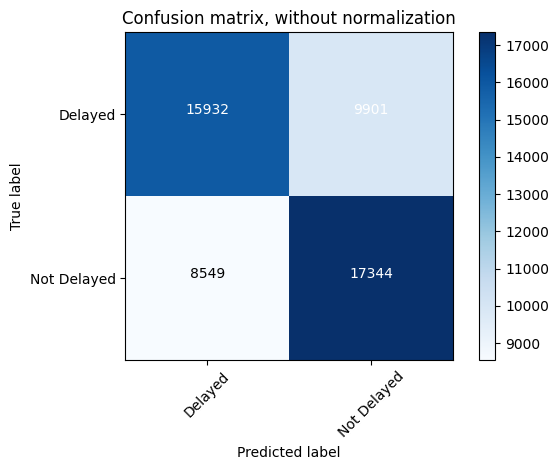

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import itertools  # Add this line for itertools
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
rf_prediction_pd = rf_prediction.select('label', 'prediction').toPandas()
y_true = rf_prediction_pd['label']
y_pred = rf_prediction_pd['prediction']
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['Delayed', 'Not Delayed'],
                      title='Confusion matrix, without normalization')

# Calculate precision, recall, f1-score, and accuracy
print(classification_report(y_true, y_pred, target_names=['Delayed', 'Not Delayed']))


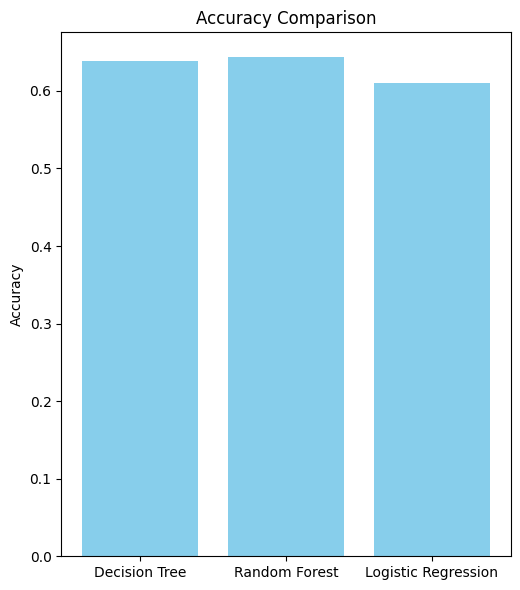

In [82]:
import matplotlib.pyplot as plt

# Define models and their performance metrics
models = ['Decision Tree', 'Random Forest', 'Logistic Regression']
accuracy_scores = [accuracy, rf_accuracy, weighted_precision]

# Plotting
plt.figure(figsize=(10, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.bar(models, accuracy_scores, color='skyblue')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()
